In [123]:
import pandas as pd
import datetime
import requests
from urllib.request import urlopen, Request
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pickle
from unicodedata import normalize
import yfinance as yf
pd.set_option('display.max_colwidth', None)

ticker = 'TSLA'
website = 'finviz'
outdir = 'parsed_data/'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/avalee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#data = yf.download("AAPL", start="2020-03-01", end="2020-03-05", interval='60m', progress=False)
symbol = 'TSLA'
data = { "function": "TIME_SERIES_INTRADAY",  # Returns most recent 1-2 months data
    "symbol": symbol,
    "interval": '5min',
    "outputsize" : "full", # compact is default (latest 100 data points)
    "apikey": "DPAPBT6VJD1DXJYK" } 
response = requests.get('https://www.alphavantage.co/query', data)



In [121]:
# #pd.DataFrame.from_dict(response.json())
price = pd.DataFrame.from_dict(response.json()['Time Series (5min)'], orient= 'index').sort_index(axis=1)
price = price.rename(columns={ '1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'})
price.index = pd.to_datetime(price.index) # Convert index to datetime idx

price.loc['2021-02-24']

,title
timestamp,
2021-03-02 16:42:00,Regional Bank Stocks Rise as Bond Yields Climb
2021-03-02 16:39:00,WRAPUP 2-Fed officials emphasize policy 'patience' as outlook improves
2021-03-02 16:38:00,"API reports a weekly climb of more than 7 million barrels in U.S. crude supplies, sources say"
2021-03-02 16:35:00,"Nordstrom tops quarterly views, promises better inventory management"
2021-03-02 16:34:00,"UPDATE 1-Robinhood, a go-to for young traders, benefits from short sale demand"
...,...
2021-03-02 11:59:00,UPDATE 1-Biden's SEC nominee vows review of GameStop trading issues
2021-03-02 11:49:00,Fuel queues form in Nigeria over fears of gasoline price hikes
2021-03-02 11:34:00,UPDATE 3-Target to invest $4 bln a year to speed up delivery as online demand soars


In [4]:
# pd.DataFrame(parsed_data, columns=['timestamp', 'title']).set_index('timestamp', drop=True)

In [7]:
file = open(f'parsed_data/{ticker}_2021-02-23_{website}.pkl', 'rb')
data = pickle.load(file)
file.close()
df = pd.DataFrame(data, columns=['timestamp', 'ticker', 'title', 'source']).set_index('timestamp', drop=True)



In [8]:
# https://www.kaggle.com/mmmarchetti/sentiment-analysis-on-financial-news
# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

# Apply vader on headlines
scores = df['title'].apply(vader.polarity_scores)
scored_df = df.join(pd.DataFrame.from_records(scores)) # convert scores to df and combine the dfs




<Figure size 720x576 with 0 Axes>

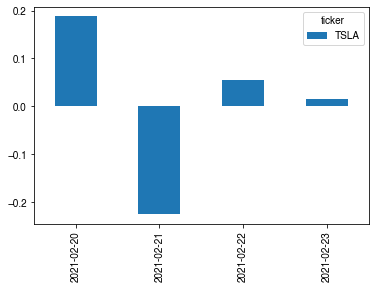

In [9]:
plt.figure(figsize=(10,8))
mean_df = scored_df.groupby(['ticker', scored_df.index.date]).mean().unstack()
mean_df = mean_df.xs('compound', axis=1).transpose()
mean_df.plot(kind='bar')
plt.show()

In [ ]:
#price.iloc[scored_df.index.round('5min')] # Locate rows with date

In [ ]:
# See which words the lexicon is classifying as positive, negative or neutral